# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.stats import shapiro
import scipy.stats as stats
import random

df = pd.read_csv('data/human_body_temperature.csv')

1.Is the distribution of body temperatures normal?

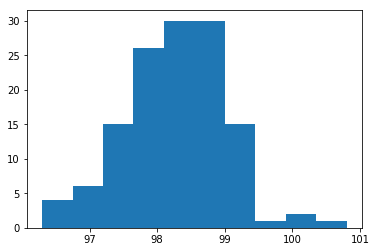

Statistics=0.987, p=0.233
Sample seems to be drawn from Normal Distribution


In [15]:
# histogram plot
pyplot.hist(df.temperature)
pyplot.show()

#Plot shows-though we see a roughly normal curve, it is not a strong bell shaped curve. So we will further investigate

# normality test- Shapiro-Wilk Test
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# check the val
if p > 0.05:
    print('Sample seems to be drawn from Normal Distribution')
else:
    print('Sample does not seem to be drawn from Normal Distribution')

In [12]:
# 2.Is the sample size large? Are the observations independent?
print('Sample Size',  df.shape)
print(df.sample(5))
#it looks like the sample size is large and the observations are independent

Sample Size (130, 3)
     temperature gender  heart_rate
42          96.9      M        74.0
61          98.4      M        84.0
119         98.4      F        74.0
44          99.0      F        79.0
128         97.9      M        72.0


3.Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

Step 1: State null and alternative hypotheses: 
        H0: mean = 98.6
        Ha: mean <> 98.6
Step 2: Set the significance level . We’ll choose 5%.
Step 3: Choose a test statistic. We wish to estimate the mean temp, and therefore we’ll use the
sample average.
Step 4: Find the observed value of the test statistic:

One-sample test caould be used here. This is because we are checking a sample of temeratures for a mean value.
Also our sample size 130 which is >30 that is sufficiently large enough to be using z statistic

In [20]:
#first calculate the sample statistics and then t val and z val
sample_mean=df.temperature.mean()
sample_std=df.temperature.std()
sample_median=df.temperature.median()
sample_size=df.temperature.size

signal=sample_mean-98.6
noise=sample_std/(sample_size**0.5)
t_val=signal/noise       # n=130, df=129

#next find the prob that true mean lies within t val std of true mean 98.6
P_value=stats.norm.cdf(t_val) * 2 # two sided
if P_value<0.05:
    print('Null Hypo Ho must be rejected. True Population Mean is not 98.6 F')
else:
    print('Null Hypo Ho is True.  True Population mean is 98.6 F.')


Null Hypo Ho must be rejected. True Population Mean is not 98.6 F


In [34]:
# next compare Z -statistic and t-statistic

#Calculate critical t-value, we use 129 since n-1 and two tailed so 0.025 : with n=130, p<0.05

crit_t=stats.t.ppf(1-0.025, 129)
cal_t=crit_t*sample_std/np.sqrt(130)
#with +- 
mean_t1=sample_mean+cal_t
mean_t2=sample_mean-cal_t
print("True mean range with z-statistic and with 95% confindence level" , round(mean_t2,2), " F to ", round(mean_t1,2), " F.")
#Calculate critical z-value from z table
# CI=95%, 2-tail= CI=97.5%, 1-tail
crit_z=stats.norm.ppf(0.975)
cal_z=sample_std*crit_z/np.sqrt(130)
# Range of true mean using z-statistic with 95% confidence level
mean_z1=sample_mean+cal_z
mean_z2=sample_mean-cal_z

print("True mean range with z-statistic and with 95% confindence level" , round(mean_z2,2), " F to ", round(mean_z1,2), " F.")

True mean range with z-statistic and with 95% confindence level 98.12  F to  98.38  F.
True mean range with z-statistic and with 95% confindence level 98.12  F to  98.38  F.


4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

Since the sample size is 10, it is best to use t- statistic

In [53]:
small_sample = df.sample(10)
#first calculate the sample statistics and then t val and z val
sample_mean=small_sample.temperature.mean()
sample_std=small_sample.temperature.std()
sample_median=small_sample.temperature.median()
sample_size=small_sample.temperature.size
# next compare Z -statistic and t-statistic

#Calculate critical t-value, we use 9 since n-1 and two tailed so 0.025 : with n=10, p<0.05

crit_t=stats.t.ppf(1-0.025, 9)
cal_t=crit_t*sample_std/np.sqrt(10)
#with +- 
mean_t1=sample_mean+cal_t
mean_t2=sample_mean-cal_t
print("True mean range with z-statistic and with 95% confindence level" , round(mean_t2,2), " F to ", round(mean_t1,2), " F.")
#Calculate critical z-value from z table
# CI=95%, 2-tail= CI=97.5%, 1-tail
crit_z=stats.norm.ppf(0.975)
cal_z=sample_std*crit_z/np.sqrt(10)
# Range of true mean using z-statistic with 95% confidence level
mean_z1=sample_mean+cal_z
mean_z2=sample_mean-cal_z

print("True mean range with z-statistic and with 95% confindence level" , round(mean_z2,2), " F to ", round(mean_z1,2), " F.")

True mean range with z-statistic and with 95% confindence level 97.8  F to  98.48  F.
True mean range with z-statistic and with 95% confindence level 97.84  F to  98.44  F.


when n>30 the t and z statistic will perform similarly. but in the second option when n=10, we see different results for t and z statistics

5.At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [56]:
mean=df.temperature.mean()
mar_error_z =sample_std*crit_z/np.sqrt(130)
cof_int = mean + np.array([-1, 1]) * mar_error_z
print("Normal human temperature range is ", round(mean_z2,2), " F to ", round(mean_z1,2), " F. Anything outside this range is abnormal")

Normal human temperature range is  97.84  F to  98.44  F. Anything outside this range is abnormal


6.Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.


Step 1: State null and alternative hypotheses: 
        H0: mean of male temps = mean of female temps
        Ha: mean of male temps <> mean of female temps
Step 2: Set the significance level . We’ll choose 5%.
Step 3: Choose a test statistic. We wish to estimate the mean temp, and therefore we’ll use the
sample average.
Step 4: Find the observed value of the test statistic:

In [60]:
#male temp
males=df[df.gender=='M']
m_mean_temp=males.temperature.mean()
m_std_temp=males.temperature.std()
#female temp
females=df[df.gender=='F']
f_mean_temp=females.temperature.mean()
f_std_temp=females.temperature.std()
# diff and std err in temperatures
mean_diff=f_mean_temp - m_mean_temp
mean_diff
SE=((m_std_temp**2)/65 + (f_std_temp**2)/65)**0.5
## Degrees of Freedom Calculation
F1=f_std_temp**2/65
M1=m_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF
## Use 0.05 Significance level in two sample t-test
t_val=((f_mean_temp-m_mean_temp)-0)/SE
t_val
p_val = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_val
if p_val<0.05:
    print('Null Hypo Ho is rejected -that mean of female and male temperatures is the not same')
    print('We can safely conclude that male and female body temperatures are significantly different with 95% confidence.')
else: 
    print('Null Hypo Ho is accepted -that mean of female and male temperatures is same')


Null Hypo Ho is rejected -that mean of female and male temperatures is the not same
We can safely conclude that male and female body temperatures are significantly different with 95% confidence.
